# <div align="center" style="color:red; font-size:40px; font-weight:bold;">Tic-Tac-Toe Game Using Reinforcement Learning</div>


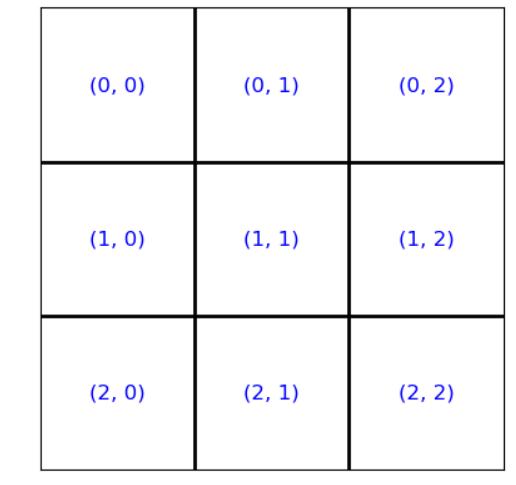

In [ ]:
import pandas as pd
import numpy as np
import random

**Code work flow**

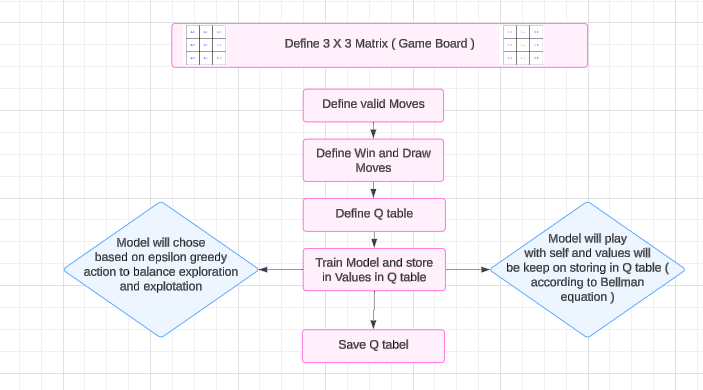

#### Create Game board

In [ ]:
"""
    Creates an empty Tic-Tac-Toe board and defines the action space.

    Returns:
        board (np.array): A 3x3 matrix initialized with zeros.
        action_space (list): A list of all possible moves as (row, col) tuples.
"""
def create_tic_tac_toe():

    ##### empty 3x3 board
    board = np.zeros((3, 3), dtype=int)

    ##### action space (all possible positions on the board)
    action_space = [(i, j) for i in range(3) for j in range(3)]

    return board, action_space

In [ ]:
# Example usage
board, action_space = create_tic_tac_toe()
print("Initial Board:")
print(board)
print("\nAction Space:")
print(action_space)

Initial Board:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Action Space:
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


#### Function for making a Move

In [ ]:
"""
    Makes a move on the Tic-Tac-Toe board.

    Args:
        board (np.array): The current state of the 3x3 board.
        action (tuple): The (row, col) position for the move.
        player (int): The player making the move (1 for AI, -1 for human).

    Returns:
        board (np.array): The updated board after the move.
        valid (bool): True if the move was valid, False otherwise.
"""
def make_move(board, action, player):
    row, col = action

    #### Check if the move is valid (cell is empty)
    if board[row, col] == 0:
        ###### Update the board with the player's mark
        board[row, col] = player
        return board, True
    else:
        ###### Invalid move
        return board, False

In [ ]:
# Example usage
board, action_space = create_tic_tac_toe()
print("Initial Board:")
print(board)

# AI makes a move at (0, 0)
board, valid = make_move(board, (0, 0), 1)
if valid:
    print("\nBoard after AI's move:")
    print(board)
else:
    print("\nInvalid move by AI.")


Initial Board:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Board after AI's move:
[[1 0 0]
 [0 0 0]
 [0 0 0]]


#### Status of Game board

In board after every move we have to check:

    1. Row wise if any value is full (1 or -1 )
    
    2. Column wise if any value is full (1 or -1 )
    
    3. Diagonal wise if any value is full (1 or -1 )
    
    4. It's draw ( if no option to furture move )

In [ ]:
"""
    Checks the status of the Tic-Tac-Toe game.

    Args:
        board (np.array): The current state of the 3x3 board.

    Returns:
        status (int or None):
            1 if AI wins,
            -1 if Human wins,
            0 if Draw,
            None if Game is ongoing.
"""
def check_game_status(board):
    ###### Check rows and columns for a win
    for i in range(3):
        if np.all(board[i, :] == 1) or np.all(board[:, i] == 1):
            return 1  ######## AI wins
        if np.all(board[i, :] == -1) or np.all(board[:, i] == -1):
            return -1  ####### Human wins

    ######## Check diagonals for a win
    if np.all(np.diag(board) == 1) or np.all(np.diag(np.fliplr(board)) == 1):
        return 1  ##### AI wins
    if np.all(np.diag(board) == -1) or np.all(np.diag(np.fliplr(board)) == -1):
        return -1  ###### Human wins

    ###### Check for a draw (no empty spaces left)
    if not np.any(board == 0):
        return 0  # Draw

    #### Game is ongoing
    return None

## Q table

##### Q-Table Initialization

1. **Empty Dictionary for Q-Values**:
   - The `q_table` is initialized as an empty dictionary that will later store Q-values for different board states.

2. **Mapping States to Actions**:
   - Each board state (a possible configuration of the Tic-Tac-Toe board) will be used as a key in the dictionary.
   - The corresponding Q-values for each action in that state will be stored as values.

In [ ]:
"""
    Initializes the Q-table for Tic-Tac-Toe.

    Returns:
        q_table (dict): A dictionary to store Q-values, with keys as states and values as action-value pairs.
"""
def initialize_q_table():

    q_table = {}  #### Q-table : empty dictionary
    return q_table

In [ ]:
"""
    Converts the board state into a unique key for the Q-table.

    Args:
        board (np.array): The current state of the 3x3 board.

    Returns:
        key (str): A string representation of the board state.
"""
def state_to_key(board):
    return ''.join(map(str, board.flatten()))

Example

In [ ]:
q_table = initialize_q_table()   ## Initilze q table
board, _ = create_tic_tac_toe()  ## Intilize board

##### Convert the board to a key
state_key = state_to_key(board)
print("State Key:", state_key)

##### Initialize Q-values for a new state
if state_key not in q_table:
    q_table[state_key] = {action: 0 for action in [(i, j) for i in range(3) for j in range(3)]}
print(q_table)

State Key: 000000000
{'000000000': {(0, 0): 0, (0, 1): 0, (0, 2): 0, (1, 0): 0, (1, 1): 0, (1, 2): 0, (2, 0): 0, (2, 1): 0, (2, 2): 0}}


State Key is state of board and value is all possible moves

### Epsilon-Greedy Action Function

This function selects an action (a move) for the agent (AI) in a given state of the Tic-Tac-Toe game based on the **epsilon-greedy policy**.

#### **Arguments:**
- **`q_table`**:
  - Stores Q-values for different state-action pairs.
- **`state_key`**:
  - The string representation of the current board state.
- **`epsilon`**:
  - Probability value (between 0 and 1) that determines the likelihood of exploration.
  - Higher `epsilon` increases the chances of random exploration.
- **`valid_actions`**:
  - List of all valid actions (empty cells on the board).

#### **Purpose:**
- Balances exploration and exploitation:
  - **Exploration**: Chooses a random valid action to try new possibilities.
  - **Exploitation**: Chooses the action with the highest Q-value based on the agent's knowledge.


In [ ]:
def epsilon_greedy_action(q_table, state_key, epsilon, valid_actions):
    if random.random() < epsilon:
        ##### Explore: Choose a random valid action
        return random.choice(valid_actions)
    else:
        ##### Exploit: Choose the action with the highest Q-value
        if state_key in q_table:
            q_values = q_table[state_key]
            return max(valid_actions, key=lambda action: q_values.get(action, 0))
        else:
            ### If state not in Q-table, randomly explore
            return random.choice(valid_actions)

### Update Q-Value Function

The `update_q_value` function updates the Q-value of a specific state-action pair using the **Bellman equation**. It helps the agent learn from the action's outcome by adjusting the Q-values in the Q-table.

#### **Arguments:**
- **`q_table`**: Dictionary storing Q-values for state-action pairs.
- **`state_key`**: Unique string representation of the current board state.
- **`action`**: Move taken in the current state (e.g., `(row, col)`).
- **`reward`**: Immediate reward received after the action (e.g., win, loss, or neutral step).
- **`next_state_key`**: Key of the board state after the action.
- **`alpha` (Learning Rate)**: Controls how much new information overwrites old knowledge.
- **`gamma` (Discount Factor)**: Balances the importance of immediate vs. future rewards.
- **`valid_actions`**: List of valid actions in the current or next state.

#### **Purpose:**
Adjusts the Q-values to reflect new knowledge, guiding the agent toward optimal gameplay.

**Bellman equation :**
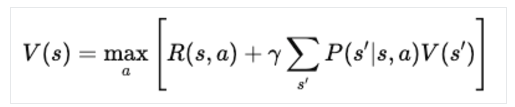

In [ ]:
def update_q_value(q_table, state_key, action, reward, next_state_key, alpha, gamma, valid_actions):
    if state_key not in q_table:
        q_table[state_key] = {a: 0 for a in valid_actions}
    if next_state_key not in q_table:
        q_table[next_state_key] = {a: 0 for a in valid_actions}

    max_future_q = max(q_table[next_state_key].values())
    current_q = q_table[state_key][action]
    q_table[state_key][action] = current_q + alpha * (reward + gamma * max_future_q - current_q)

#### Train model

### `train_ai` Function

The `train_ai` function trains the AI agent through self-play over a specified number of episodes. The agent improves its decision-making by updating the Q-table based on the outcomes of each game.

#### **Arguments:**
- **`q_table`**: Dictionary storing Q-values for state-action pairs.
- **`episodes`** (default=100,000): The number of training games (episodes).
- **`alpha`**: Learning rate for Q-value updates.
- **`gamma`**: Discount factor balancing immediate and future rewards.
- **`epsilon`**: Exploration probability for the epsilon-greedy policy.


We will train model for few number of episodes
Here AI will start the game and game will continoue till game is over

In [ ]:
def train_ai(q_table, episodes=1000000, alpha=0.1, gamma=0.7, epsilon=0.75):
    for episode in range(episodes):
        board, _ = create_tic_tac_toe()  #### Initialize a new game
        state_key = state_to_key(board)
        game_over = False
        current_player = 1  #### AI starts

        while not game_over:
            ###### Get valid actions
            valid_actions = [(i, j) for i in range(3) for j in range(3) if board[i, j] == 0]

            ###### Choose an action using epsilon-greedy policy
            action = epsilon_greedy_action(q_table, state_key, epsilon, valid_actions)

            ###### Make the move
            board, valid = make_move(board, action, current_player)
            if not valid:
                continue  ##### Skip invalid move

            ######## Check game status
            status = check_game_status(board)

            if status is not None:
                ###### Game over
                reward = 2 if status == current_player else -2 if status == -current_player else 0
                ## Give reward 2 if AI wins
                ## If other player ( Human wins give -2 reward)
                update_q_value(q_table, state_key, action, reward, None, alpha, gamma, valid_actions)
                game_over = True
            else:
                ####### Game not over, update Q-values
                next_state_key = state_to_key(board)
                update_q_value(q_table, state_key, action, 0, next_state_key, alpha, gamma, valid_actions)
                state_key = next_state_key

            ###### Switch player
            current_player *= -1

    return q_table

In [ ]:
#### Train the AI
q_table = initialize_q_table()
q_table = train_ai(q_table, episodes=10000)
print("Training complete!")

Training complete!


##### Save Q table

In [ ]:
import pickle
def save_q_table(q_table, file_name="q_table.pkl"):
    with open(file_name, "wb") as f:
        pickle.dump(q_table, f)

In [ ]:
save_q_table(q_table, file_name="q_table.pkl")